# <center>  AirBnB listing data - Ireland (March 2021) </center>
## <center> Project 1 - Udacity 'Data Scientist' Nanodegree </center>
### <center>Sorcha Nic Conmara | June 2021</center>

Import all libraries used and set `pandas` options

In [1]:
import gzip
import re
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

# 1 - Gather

Unzip Datasets - useful if you don't have an unzipping software installed

In [2]:
# unizp .gz listings file
with gzip.open('raw_data/listings.csv.gz', 'rb') as f_in:
    with open('raw_data/listings.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Read in data from CSV

In [3]:
# read in csv and set listing ID as index
raw_listings = pd.read_csv('raw_data/listings.csv', index_col=0)
# Create clean data from copy of the raw data
listings = raw_listings.copy()

**Dataset**:

- `listings`: detailed listing information for AirBnBs in Ireland (as of March 2021), one row per ID/listing - ((26154, 80) before cleaning)

# 2 - Assess

Take a quick look at the data, frequency of nulls, etc.

In [4]:
listings.shape

(26154, 79)

In [5]:
listings.dtypes

listing_url                                      object
scrape_id                                         int64
last_searched                                    object
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

We can see from below that there are definitely some unneccessary columns we can drop such as the `_url` columns

In [6]:
listings.head()

,listing_url,scrape_id,last_searched,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5373926,https://www.airbnb.com/rooms/5373926,20210328182508,NaN,2021-03-30,3 Bed House close to the City Centre,My place is close to Blackhorse Luas Stop. You...,NaN,https://a0.muscache.com/pictures/94c63797-0b9c...,27857643,https://www.airbnb.com/users/show/27857643,Margaret,2015-02-16,"Dublin, County Dublin, Ireland",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3d2e9...,https://a0.muscache.com/im/pictures/user/3d2e9...,Crumlin,3.0,3.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,53.33437,-6.32485,Entire house,Entire home/apt,5,NaN,1 bath,3.0,3.0,"[""Essentials"", ""Heating"", ""Free parking on pre...",$100.00,5,7,5,5,7,7,5.0,7.0,NaN,t,0,0,0,0,2021-03-30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,2,1,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,NaN
17380757,https://www.airbnb.com/rooms/17380757,20210328182508,NaN,2021-04-04,Great location double bed,Perfectly located double room beside bus route...,NaN,https://a0.muscache.com/pictures/fd1dc3da-6af4...,97867277,https://www.airbnb.com/users/show/97867277,Michelle,2016-10-04,"Victoria, Australia",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/acf58...,https://a0.muscache.com/im/pictures/user/acf58...,NaN,1.0,1.0,"['email', 'phone', 'facebook']",t,f,NaN,53.32041,-6.33496,Private room in house,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Essentials"", ""Hangers"", ""Brea...",$40.00,1,4,1,1,4,4,1.0,4.0,NaN,t,0,0,0,0,2021-04-04,1,0,0,2017-04-12,2017-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,0.02
35559565,https://www.airbnb.com/rooms/35559565,20210328182508,NaN,2021-03-29,Bright modern apartment,Bright spacious one bedroom apartment. Large o...,Lovely quiet development backing onto lovely p...,https://a0.muscache.com/pictures/4ddc6c77-d415...,54948366,https://www.airbnb.com/users/show/54948366,Conor,2016-01-17,"Dublin, Dublin, Ireland",Irish guy mid 20’s born and raised in Dublin l...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/6364d...,https://a0.muscache.com/im/pictures/user/6364d...,Ballyfermot,1.0,1.0,"['email', 'phone', 'facebook', 'offline_govern...",t,t,"Dublin 10, County Dublin, Ireland",53.33672,-6.37989,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Bed linens"", ""Sm...",$59.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,0,2021-03-29,9,0,0,2019-06-26,2019-11-11,96.0,10.0,10.0,10.0,10.0,

The following columns have some null values:

In [7]:
listings.columns[listings.isnull().mean() > 0]

Index(['last_searched', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'reviews_per_month'],
      dtype='object')

The following columns have >50% null values:

In [8]:
listings.columns[listings.isnull().mean() > 0.5]

Index(['host_about', 'host_neighbourhood', 'bathrooms', 'calendar_updated',
       'requires_license', 'license'],
      dtype='object')

# Questions related to real-world context to answer:

Based on the initial look at the data, there are a number of questions I am interested in answering in this notebook. These include:
1. **Where in Ireland is the mean/median price for an AirBnB the most expensive?** Is it in Dublin where house prices tend to be the most expensive? The median price may be a better measure here as outliers in price from counties with fewer AirBnBs may skew the data.


2. **What counties have the fewest AirBnBs and could be areas potential hosts may consider listing a property in?Also, what kind of rooms are most popular? (and therefore be considered by potential hosts)**


3. **What features affect the price of the listing? And to what extent?** 
E.g.:

 - does being a superhost/the hosts tenure affect price?
 - does the number of bedrooms/bathrooms affect price? 
 - does the number of reviews/overall review score rating affect price?
    
    
4. **Can the price of a listing be predicted? This could be used by hosts when listing to determine what to charge for the listing.**

# 3 - Clean
## Data Cleaning/Preprocessing & Feature Engineering

`Bathrooms` column is null, extract number of bathrooms from `bathrooms_text`

In [9]:
# replacement rules for the strings in listings.bathrooms_text
repl_map = dict([
    ("Private half-bath", "0.5"),
    ("Shared half-bath", "0.5"),
    ("Half-bath", "0.5"),
    ("bath", ""),
    ("baths", ""),
    ("shared", ""),
    ("private", ""),
])

# make copy of column
col = listings['bathrooms_text'].copy()

# make replacements
for key,val in repl_map.items():
    r1 = (r"(\b)(%s)(\b)" % key) 
    r2 = (lambda x: repl_map.get(x.group(), x.group()))
    col = col.str.replace(r1, r2, regex=True, flags=re.IGNORECASE)
    col = col.str.strip() # remove whitespace
    
listings['bathrooms'] = col # assign values back to column
listings['bathrooms'] = listings.bathrooms.astype('float64')

#### Investigate Missing Values & Drop Unnecessary Columns

Column sets to be dropped:

- `mostly_null_cols`: columns containing > 50% nulls.

- `url_cols`: columns containing urls related to the host or the listing, not necessary.

- `unnec_cols`: other columns not necessary for this analysis. Note: the desscription/name columns could potentially be useful for NLP, etc but is not necessary for this analysis.

In [10]:
mostly_null_cols = set(listings.columns[listings.isna().mean() > 0.5])
url_cols = set(listings.filter(regex='_url', axis=1).columns)
unnec_cols = ['scrape_id', 'last_searched', 'last_scraped', 'neighborhood_overview',\
              'host_location', 'calendar_last_scraped','first_review', 'name', 'description', 'host_name', 'bathrooms_text']

In [11]:
cols_to_drop = set.union(mostly_null_cols, url_cols, unnec_cols)
print(cols_to_drop)

#drop these columns
listings = listings.drop(cols_to_drop, axis=1)

{'requires_license', 'license', 'calendar_last_scraped', 'host_thumbnail_url', 'host_neighbourhood', 'scrape_id', 'listing_url', 'host_location', 'picture_url', 'first_review', 'last_scraped', 'host_picture_url', 'last_searched', 'host_name', 'calendar_updated', 'description', 'name', 'neighborhood_overview', 'host_url', 'bathrooms_text', 'host_about'}


Create more useful variables from existing ones such as `host_tenure_in_days` and `days_since_last_review`

In [12]:
# Change datatypes
listings['host_since'] = pd.to_datetime(listings.host_since)
listings['last_review'] = pd.to_datetime(listings.last_review)

# Date data was compiled - use this for calculating host tenure, etc
date_compiled = pd.to_datetime('03/28/2021')

listings['host_tenure_in_days'] = listings.host_since.apply(lambda date: pd.Timedelta(date_compiled-date).days)
listings['days_since_last_review'] = listings.last_review.apply(lambda date: pd.Timedelta(date_compiled-date).days)
    
listings = listings.drop(['host_since', 'last_review'], axis=1)

Clean non-numeric characters in some columns such as `host_response_rate`, `host_acceptance_rate` and `price`

In [13]:
#the following columns have symbols in them ($, %, etc)
messy_cols = ['host_response_rate', 'host_acceptance_rate', 'price']

for col in messy_cols:
    listings[col] = listings[col].str.extract(r'(\d+)')
    listings[col] = listings[col].astype(float)

Impute remaining missing values in numeric columns using the column mean

In [14]:
fill_mean = lambda col : col.fillna(col.mean())

numeric_columns = listings.select_dtypes(include=['number']).columns

# replace nulls in numeric columns with mean of column
listings[numeric_columns] = listings[numeric_columns].apply(fill_mean, axis = 0)

Round columns for number of bedrooms, beds and bathrooms so that any imputed values aren't floats. i.e - 1.8 beds doesn't make sense. While this isn't ideal for bathrooms as you can have half bathrooms, the proportion of these is low and I wan't to avoid situations like '2.3 bathrooms' being imputed.

In [15]:
cols_to_round = ['accommodates', 'beds', 'bedrooms', 'bathrooms']
listings[cols_to_round] = listings[cols_to_round].round()

Encode `host_verifications` into dummy columns

In [16]:
#clean up column before using multi label binarizer to encode
listings['host_verifications'] = listings['host_verifications'].apply(lambda x: x.replace("[", "").\
                        replace("]", "").replace("'", "").split(","))

host_ver = listings.host_verifications
mlb = MultiLabelBinarizer()

host_ver_enc = pd.DataFrame(mlb.fit_transform(host_ver),columns=mlb.classes_, index=listings.index)
host_ver_enc.columns = ['hostver_' + str(col) for col in host_ver_enc.columns]
host_ver_enc = host_ver_enc.drop('hostver_', axis =1)

listings = listings.drop('host_verifications', axis=1)

host_ver_enc.head()

,hostver_ facebook,hostver_ google,hostver_ government_id,hostver_ identity_manual,hostver_ jumio,hostver_ kba,hostver_ manual_offline,hostver_ manual_online,hostver_ offline_government_id,hostver_ phone,hostver_ reviews,hostver_ selfie,hostver_ sent_id,hostver_ work_email,hostver_ zhima_selfie,hostver_None,hostver_email,hostver_facebook,hostver_google,hostver_jumio,hostver_offline_government_id,hostver_phone,hostver_reviews
id,,,,,,,,,,,,,,,,,,,,,,,
5373926,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
17380757,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
35559565,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
27055293,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
17427277,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


`Amenities` column is a lot messier, so creating a count of amenities per AirBnB

In [17]:
# clean up ammenities column and get number of amenities per listings
listings['num_amenities'] = listings['amenities'].apply(lambda x: len(x.replace("[", "").\
                        replace("]", "").replace("'", "").split(",")))

listings = listings.drop('amenities', axis=1)

Concatenate cleaned data with encoded host verification dataframe

In [18]:
listings = pd.concat([listings, host_ver_enc], axis=1)

Convert 't' and 'f' columns (`indicator_cols`) to binary indicators (1,0)

In [19]:
indicator_cols = ['host_has_profile_pic', 'host_is_superhost', 'host_identity_verified', \
                  'has_availability', 'instant_bookable']

for col in indicator_cols:
    listings[col] : listings[col].replace({'f': 0, 't': 1}, inplace=True)
    listings[col] = listings[col].astype('Int64')
    # there are a few NAs here, if we don't know an indicator, assume indicator not present
    listings[col] = listings[col].fillna(0)

A look at the cleaned dataset, `listings`:

In [20]:
listings.head()

,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month,host_tenure_in_days,days_since_last_review,num_amenities,hostver_ facebook,hostver_ google,hostver_ government_id,hostver_ identity_manual,hostver_ jumio,hostver_ kba,hostver_ manual_offline,hostver_ manual_online,hostver_ offline_government_id,hostver_ phone,hostver_ reviews,hostver_ selfie,hostver_ sent_id,hostver_ work_email,hostver_ zhima_selfie,hostver_None,hostver_email,hostver_facebook,hostver_google,hostver_jumio,hostver_offline_government_id,hostver_phone,hostver_reviews
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5373926,27857643,NaN,90.382929,80.166779,0,3.0,3.0,1,1,NaN,53.33437,-6.32485,Entire house,Entire home/apt,5,1.0,3.0,3.0,100.0,5,7,5,5,7,7,5.0,7.0,1,0,0,0,0,0,0,0,95.684589,9.770964,9.612672,9.852589,9.851867,9.741484,9.546823,0,3,2,1,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,1.073477,2232.0,411.182485,14,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
17380757,97867277,NaN,90.382929,80.166779,0,1.0,1.0,1,0,NaN,53.32041,-6.33496,Private room in house,Private room,2,2.0,1.0,1.0,40.0,1,4,1,1,4,4,1.0,4.0,1,0,0,0,0,1,0,0,95.684589,9.770964,9.612672,9.852589,9.851867,9.741484,9.546823,1,1,0,1,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,0.020000,1636.0,1446.000000,17,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
35559565,54948366,NaN,90.382929,80.166779,1,1.0,1.0,1,1,"Dublin 10, County Dublin, Ireland",53.33672,-6.37989,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,59.0,2,1125,2,2,1125,1125,2.0,1125.0,1,0,0,0,0,9,0,0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,1,0,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,0.420000,1897.0,503.000000,21,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
27055293,73387091,NaN,90.382929,80.166779,0,1.0,1.0,1,1,NaN,53.35072,-6.34563,Entire apartment,Entire home/apt,6,2.0,2.0,2.0,350.0,5,1125,5,5,1125,1125,5.0,1125.0,1,30,60,90,90,0,0,0,95.684589,9.770964,9.612672,9.852589,9.851867,9.741484,9.546823,1,1,1,0,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,1.073477,1771.0,411.182485,10,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
17427277,117890533,NaN,90.382929,80.166779,0,1.0,1.0,1,0,"Dublin, County Dublin, Ireland",53.33621,-6.32899,Private room in house,Private room,5,2.0,3.0,3.0,110.0,1,10,1,1,10,10,1.0,10.0,1,0,0,0,0,12,0,0,100.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,1,1,0,1,0,13260422,Ballyfermot-Drimnagh LEA-5,265011,Dublin City Council,IE061,Dublin,0.240000,1493.0,378.000000,17,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
listings.describe()

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_parent_id,reviews_per_month,host_tenure_in_days,days_since_last_review,num_amenities,hostver_ facebook,hostver_ google,hostver_ government_id,hostver_ identity_manual,hostver_ jumio,hostver_ kba,hostver_ manual_offline,hostver_ manual_online,hostver_ offline_government_id,hostver_ phone,hostver_ reviews,hostver_ selfie,hostver_ sent_id,hostver_ work_email,hostver_ zhima_selfie,hostver_None,hostver_email,hostver_facebook,hostver_google,hostver_jumio,hostver_offline_government_id,hostver_phone,hostver_reviews
count,2.615400e+04,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.00000,2.615400e+04,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000,26154.000000
mean,1.150875e+08,90.382929,80.166779,0.345033,81.401812,81.401812,0.945247,0.588361,53.137077,-7.869902,4.096238,1.647893,1.994647,2.651373,112.307104,3.652176,609.714078,4.692743,5.203028,727.630993,740.313031,4.866261,736.254772,0.996215,12.369771,26.963868,41.504512,156.287107,35.972891,3.833066,0.092873,95.684589,9.770964,9.612672,9.852589,9.851867,9.741484,9.546823,0.418330,6.486962,3.385409,2.986694,0.05070,7.618076e+06,149281.227728,1.073477,1678.104752,411.182485,22.936530,0.133135,0.037547,0.582244,0.271851,0.377533,0.003212,0.011700,0.006309,0.454347,0.863157,0.526115,0.289898,0.000459,0.095091,0.000229,0.050623,0.865260,0.000038,0.000076,0.000076,0.000038,0.082855,0.000726
std,1.002738e+08,18.550242,24.844298,0.475388,717.195315,717.195315,0.227501,0.492140,0.838398,1.417897,2.783862,1.122049,1.339499,2.342269,100.233756,20.490816,537.380672,27.465624,27.634933,520.996749,529.329129,27.482088,524.275247,0.061409,13.454235,26.449422,38.253993,136.543887,62.614251,7.875812,0.567725,6.389373,0.605890,0.763175,0.516482,0.520619,0.554693,0.726354,0.493294,21.830095,12.505335,18.025557,0.61029,5.927079e+06,93573.742114,1.183323,747.323423,350.111625,9.861548,0.339727,0.190101,0.493199,0.444922,0.484779,0.056582,0.107534,0.079178,0.497921,0.343688,0.499327,0.453724,0.021416,0.293346,0.015145,0.219231,0.341453,0.006183,0.008745,0.008745,0.006183,0.275669,0.026944
min,4.292800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.431330,-10.539890,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

# 4 - Analyse - (includes some visualisations)

Functions for plot types created often:

In [22]:
def plot_price_distribution(df):
    """ Function to plot price distribution. Takes input dataframe which contains a column named 'price'"""
    plt.figure(figsize=(10, 8))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.ylabel('Count', fontsize=18)
    plt.xlabel('Price ($)', fontsize=18)
    plt.title('AirBnB Listing Price Distribution', fontsize=18);

In [23]:
def plot_horizontal_barchart(df, x_input, x_label, y_label, plt_title, y_input=None):
    """ Function to plot horizontal barchart. Takes input dataframe, x_input (plot x), optional y_input (plot y),\
        x_label and y_label for axes and plt_title for the plot title."""
    plt.figure(figsize=(10, 8))
    df.plot(x=x_input, y=y_input, kind="barh")
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(plt_title, fontsize=18);

In [24]:
def plot_boxplots(df, groupby_col, y_col, x_label, y_label, plt_title):
    """ Function to plot boxplots of groupby_col(e.g region) by y_col(e.g price). Takes input dataframe which contains\
    columns groupby_col and y_col, x_label and y_label for axes and plt_title for the plot title.'"""
    plt.figure(figsize=(10, 8))
    sort_order = df.groupby(groupby_col)[y_col]\
                        .median()\
                        .index
    sns.boxplot(y=y_col, x=groupby_col, data=df, 
                order=sort_order, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(plt_title, fontsize=18);
    plt.show()

In [25]:
def plot_heatmap(df, groupby1, groupby2, x_label, y_label, plt_title):
    """ Function to plot dataframe grouped by two columns using sns heatmap(). Takes input dataframe which contains\
    columns groupby1 and groupby2, x_label and y_label for axes and plt_title for the plot title.'"""
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(df.groupby([groupby1, groupby2]).median()['price'].reset_index()\
                     .pivot(groupby1, groupby2, 'price').sort_index(ascending=False), annot=True, fmt=".0f", cmap="Blues")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(plt_title, fontsize=18)

### Q1 - Where in Ireland is the mean/median price for an AirBnB the most expensive? 

Plot the mean `price` per Council (region):

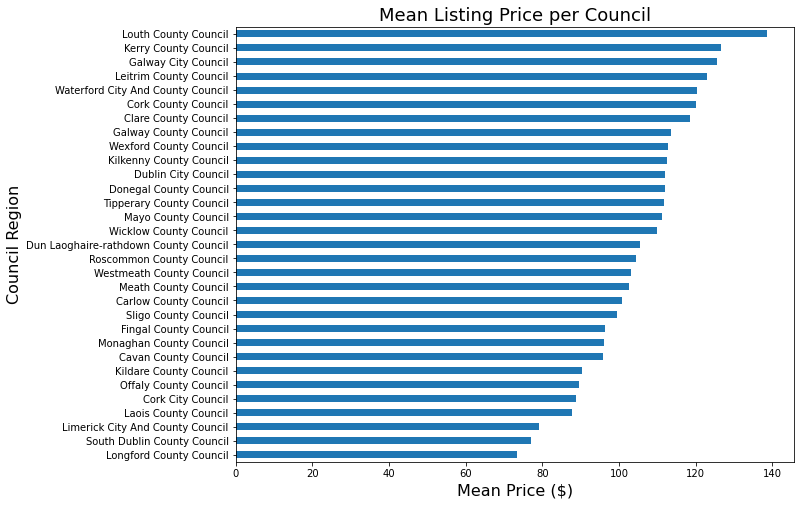

In [26]:
gr_mean_listings = (listings.groupby('region_parent_name')['price'].mean()).sort_values(ascending=True)

plot_horizontal_barchart(df=gr_mean_listings,x_input="region_parent_name",y_input="price", \
                         x_label='Mean Price ($)', y_label='Council Region', plt_title='Mean Listing Price per Council')

This was quite surprising as Leitrim, for example, is the county with the smallest population in the country yet it has the 4th most expensive mean listing price. If we investigate the distribution of the `price` feature and the number of listings per Council here we can see that there are fewer listings in Leitrim than in Dublin for example, and a few outliers in `price` which is likely pulling the mean `price` up.

Investigate the number of listings per Council:

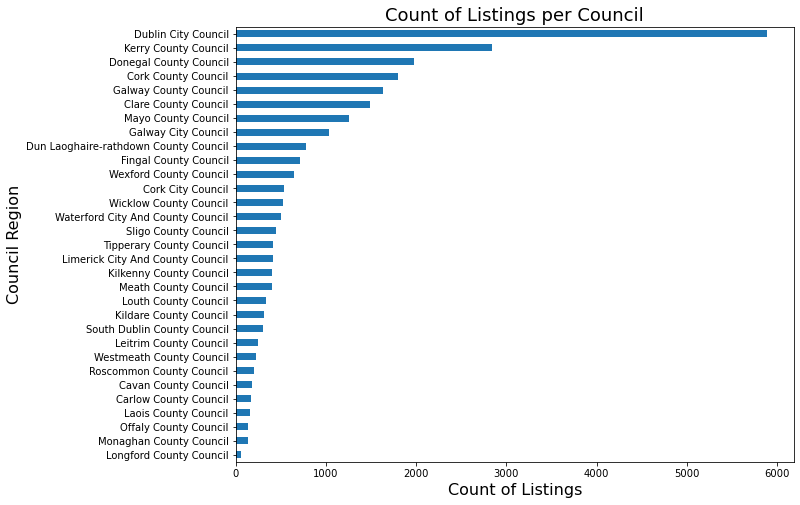

In [27]:
gr_cnt_listings = listings.region_parent_name.value_counts().sort_values(ascending=True)

plot_horizontal_barchart(df=gr_cnt_listings,x_input="region_parent_name", \
                         x_label='Count of Listings', y_label='Council Region', plt_title='Count of Listings per Council')

In [28]:
leitrim_price = pd.DataFrame(listings.query("region_parent_name == 'Leitrim County Council'")['price'])\
                .sort_values(by='price', ascending=False)

print('Listing Price Distribution - Leitrim')
leitrim_price.describe() # look at the distribution in tabular form

Listing Price Distribution - Leitrim


,price
count,248.000000
mean,123.044355
std,105.540378
min,20.000000
25%,69.000000
50%,90.000000
75%,141.500000
max,707.000000


Plot the listing price distribution for Leitrim:

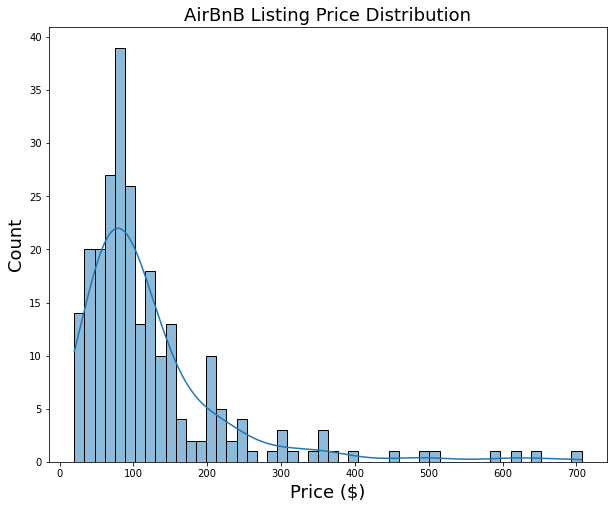

In [29]:
plot_price_distribution(df=leitrim_price)

As suspected, the majority of councils with the highest mean listing price have some of the smallest counts of listings. By looking at the distirbution of prices in Leitrim for example, we can see that there are a number of outliers which are also skewing the mean. Because of this, the median listing price is likely a more accurate representation of the data. We can plot the overall listing price distribution to confirm this, but its likely that listing price is skewed.

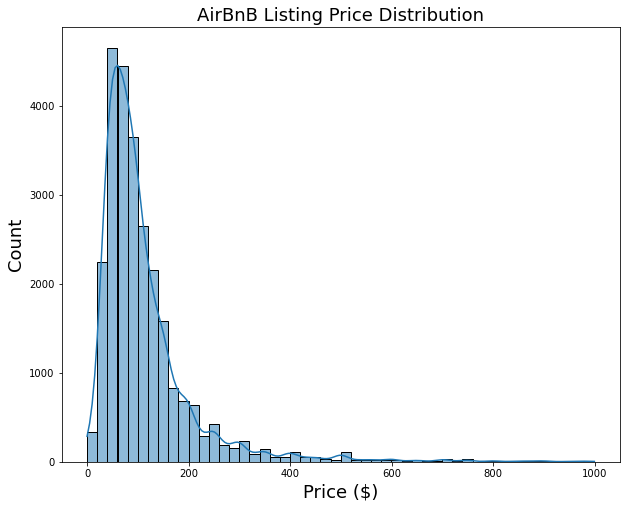

In [30]:
plot_price_distribution(df=listings[numeric_columns])

As expected, the listing price distribution for the entire dataset is skewed so the median is a better representation of the data than the mean.

Plot the median listing price per Council:

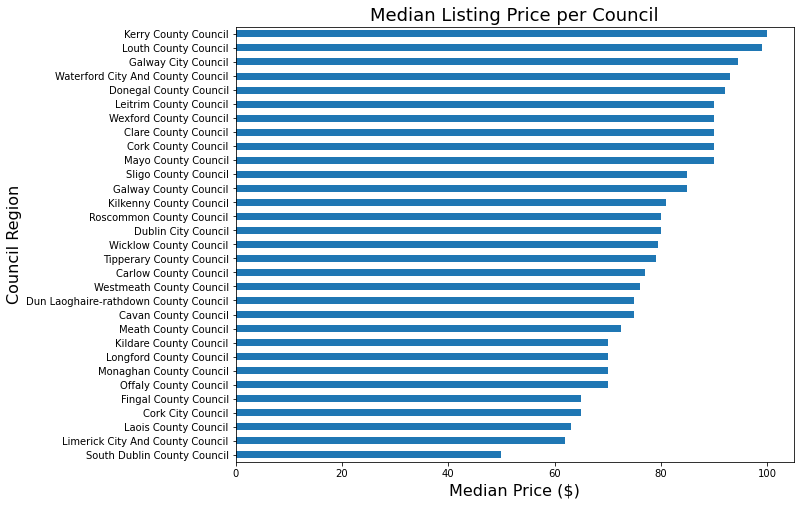

In [31]:
gr_med_listings = (listings.groupby('region_parent_name')['price'].median()).sort_values(ascending=True)


plot_horizontal_barchart(df=gr_med_listings,x_input="region_parent_name", y_input="price", x_label='Median Price ($)',\
                         y_label='Council Region', plt_title='Median Listing Price per Council')

These results still aren't perfect, but they give us a better understanding of the overall most expensives regions in Ireland. In further analyes, one could consider analysing Dublin and its neighbourhoods separately as it has ~6k listings.

### Q2 -  What counties have the fewest AirBnBs and are areas potential hosts may consider listing in? Also, what kind of rooms are most popular? (and therefore be considered by potential hosts)

We briefly saw from Q1 the number of listings per Council (see below as a reminder). Let's look at the 3 Council regions with the fewest listings in more detail.

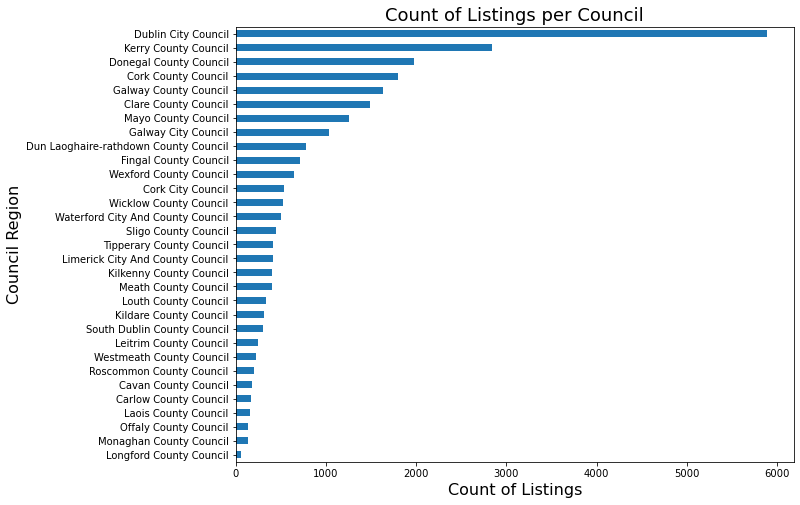

In [32]:
plot_horizontal_barchart(df=gr_cnt_listings,x_input="region_parent_name", \
                         x_label='Count of Listings', y_label='Council Region', plt_title='Count of Listings per Council')

The 3 regions with the fewest listings are Longford, Monaghan & Offaly. Let's look at their price distribution and also some boxplots to compare the individal distributions.

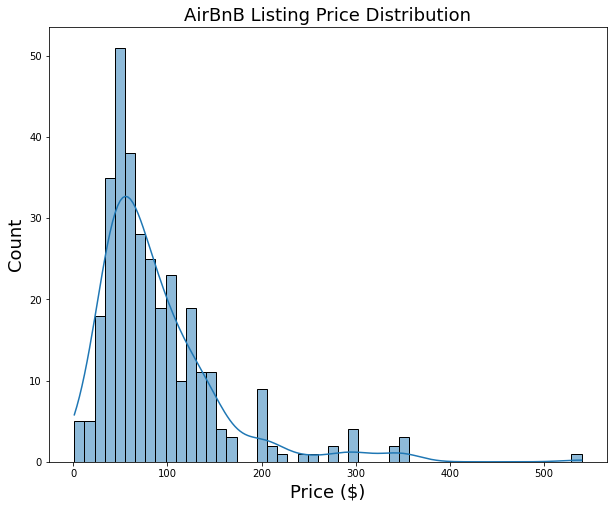

In [33]:
bottom_3 = listings[listings.region_parent_name.isin(gr_cnt_listings[:3].index)]
plot_price_distribution(df=bottom_3)

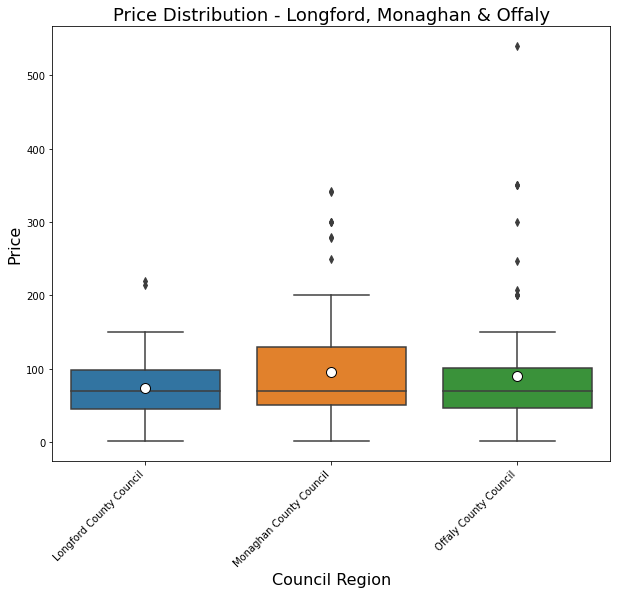

In [34]:
plot_boxplots(df=bottom_3, groupby_col='region_parent_name', y_col='price', x_label='Council Region', y_label='Price', \
              plt_title='Price Distribution - Longford, Monaghan & Offaly')

If I were considering listing an AirBnB, Longford, Monaghan and Offaly would definitely be considered on the list of preferred locations. Although the demand is unknown, by looking at scarcity alone we can see there is opportunity for potential hosts here and the cost of even buying property for use as an AirBnB would be cheaper than in Dublin.

Let's look at what types of properties/rooms are most popular across all of Ireland:

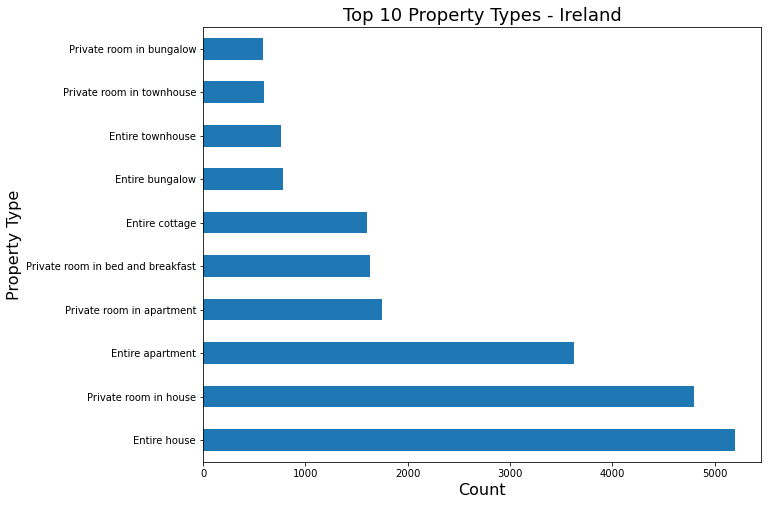

In [35]:
property_cnt = listings.property_type.value_counts()[:10]

plot_horizontal_barchart(df=property_cnt, x_input='property_type', y_label='Property Type', x_label='Count', \
                         plt_title='Top 10 Property Types - Ireland')

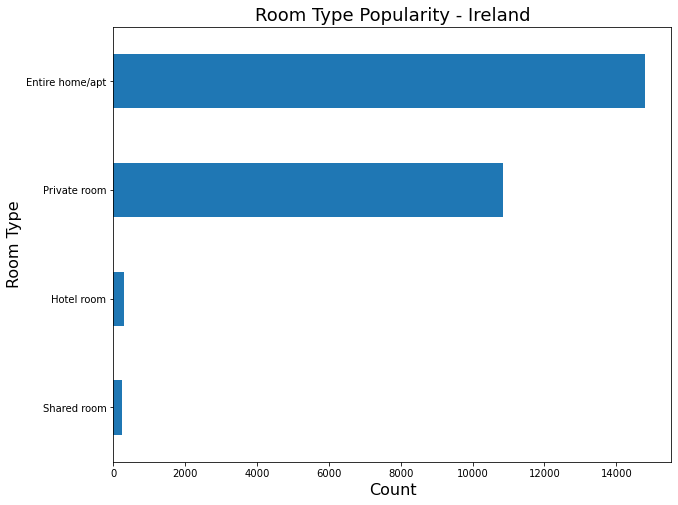

In [36]:
gr_roomtype_listings = listings.room_type.value_counts().sort_values(ascending=True)


plot_horizontal_barchart(df=gr_roomtype_listings, x_input='room_type', y_label='Room Type', x_label='Count', \
                         plt_title='Room Type Popularity - Ireland')

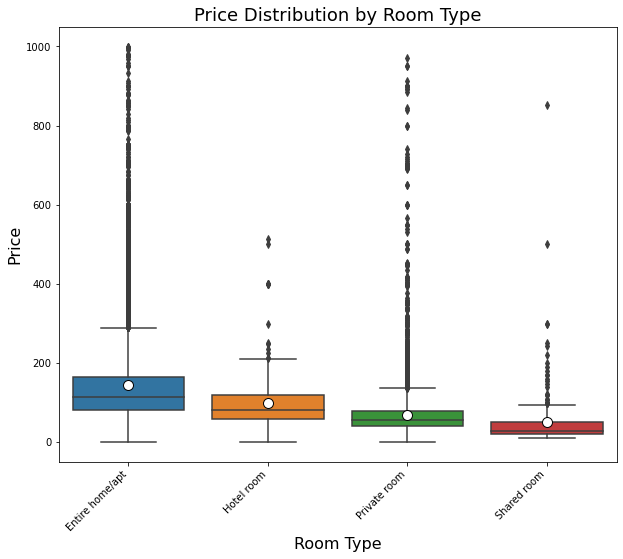

In [37]:
plot_boxplots(df=listings, groupby_col='room_type', y_col='price', x_label='Room Type', y_label='Price', \
              plt_title='Price Distribution by Room Type')

If I were a potential host, I would consider listing an entire home/apt or a private room as these are the most popular in terms of volume in Ireland.

### Q3 - What features affect the price of the listing? And to what extent? E.g.:
 - does being a superhost/the hosts' rating affect price?
 - does the number of bedrooms/bathrooms affect price? 
 - does the number of reviews/days since last review/average overall review score affect price?

According to AirBnB, "`` Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a badge will automatically appear on their listing and profile to help you identify them. AirBnB check Superhosts’ activity four times a year, to ensure that the program highlights the people who are most dedicated to providing outstanding hospitality.``"

I would have expected this to have an impact on the price as people would likely expect to pay more to stay in a superhost's listing but this doesn't seem to be the case as both distributions are very similar.

 - does being a superhost/the hosts' rating affect price?

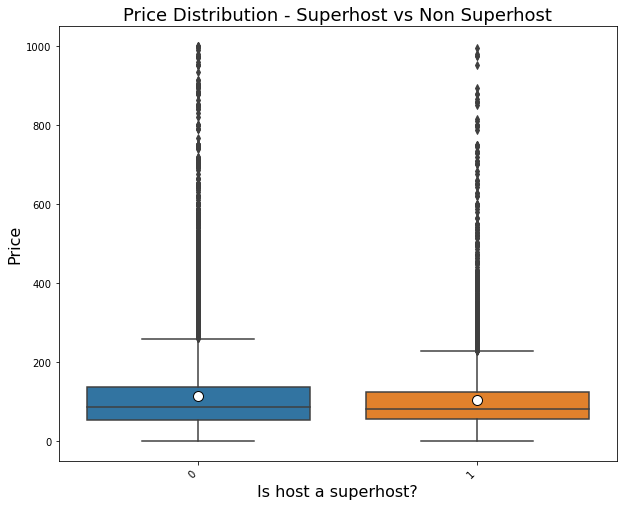

In [38]:
plot_boxplots(df=listings, groupby_col='host_is_superhost', y_col='price', x_label='Is host a superhost?', y_label='Price', \
              plt_title='Price Distribution - Superhost vs Non Superhost')

I then thought that a superhost status might affect the Review Rating and it does, but only ever so slightly. We can see that superhosts tend to have a higher mean, median, Q1 and Q3 than non-superhosts.

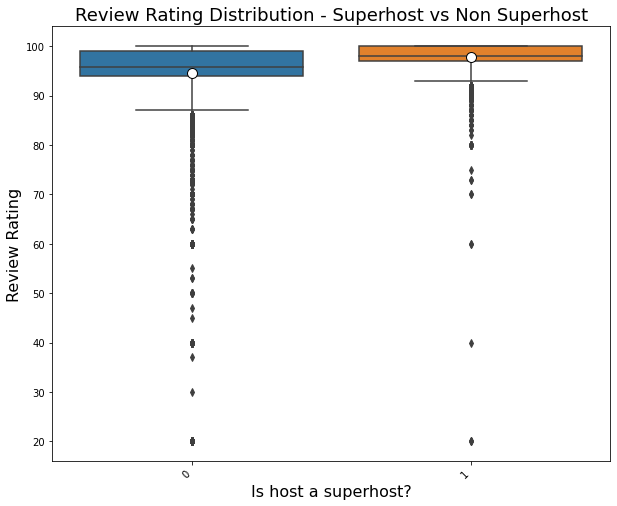

In [39]:
plot_boxplots(df=listings, groupby_col='host_is_superhost', y_col='review_scores_rating', x_label='Is host a superhost?', y_label='Review Rating', \
              plt_title='Review Rating Distribution - Superhost vs Non Superhost')

 - does the number of bedrooms/bathrooms affect price? 

As we can see below, as the number of bedrooms (and the number of beds) and bathrooms increase, so too does the median price, with some exceptions.

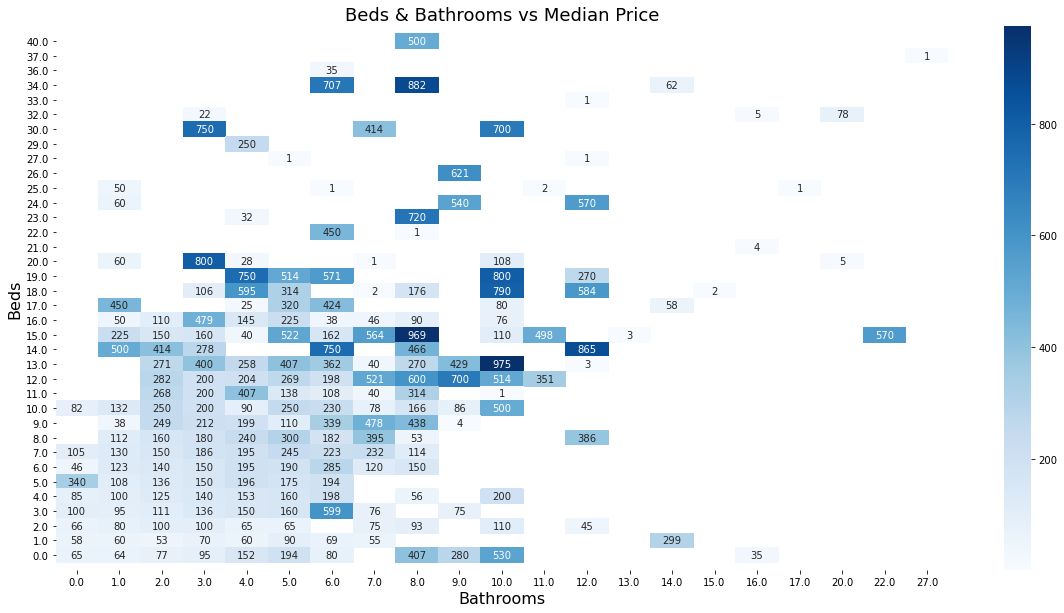

In [40]:
plot_heatmap(df=listings, groupby1='beds', groupby2='bathrooms', x_label='Bathrooms',\
             y_label='Beds', plt_title = 'Beds & Bathrooms vs Median Price')

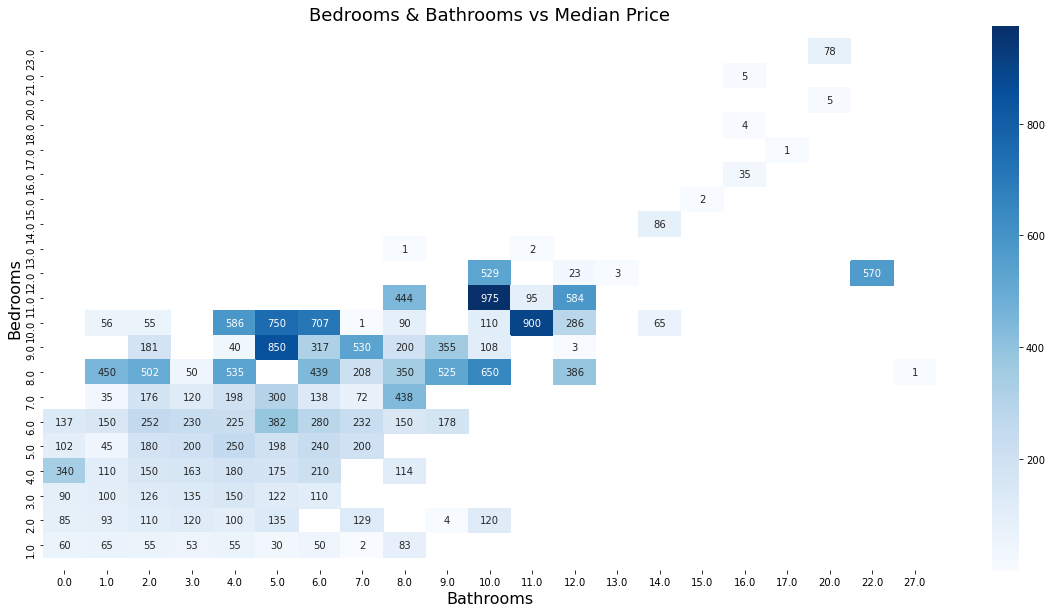

In [41]:
plot_heatmap(df=listings, groupby1='bedrooms', groupby2='bathrooms', x_label='Bathrooms',\
             y_label='Bedrooms', plt_title = 'Bedrooms & Bathrooms vs Median Price')

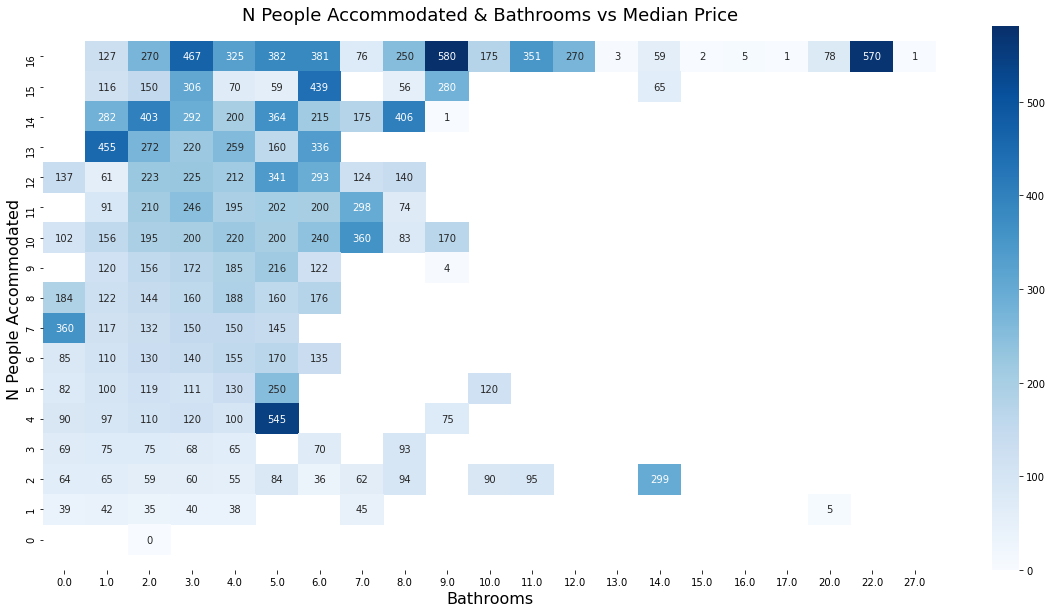

In [42]:
plot_heatmap(df=listings, groupby1='accommodates', groupby2='bathrooms', x_label='Bathrooms',\
             y_label='N People Accommodated', plt_title = 'N People Accommodated & Bathrooms vs Median Price')

Its quite interesting that the median price for a 14 bedroom AirBnB is very similar to that of a 1 bedroom or 2 bedroom AirBnB. Perhaps its a lot more difficult to fill a 14 bedroom listing and so hosts possibly reduce the price of the listing. Also, the mean and median price for a 6 bedroom listing is higher than that of a 7 bedroom listing.

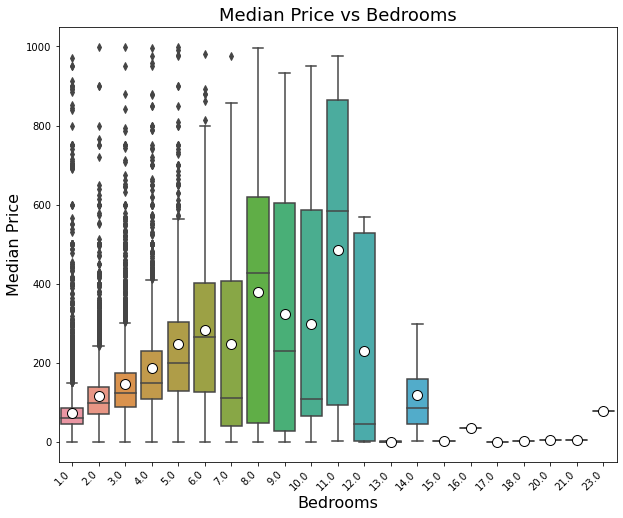

In [43]:
plot_boxplots(df=listings, groupby_col='bedrooms', y_col='price', x_label='Bedrooms',\
              y_label='Median Price', plt_title='Median Price vs Bedrooms')

 - does the number of reviews/overall review score rating affect price?

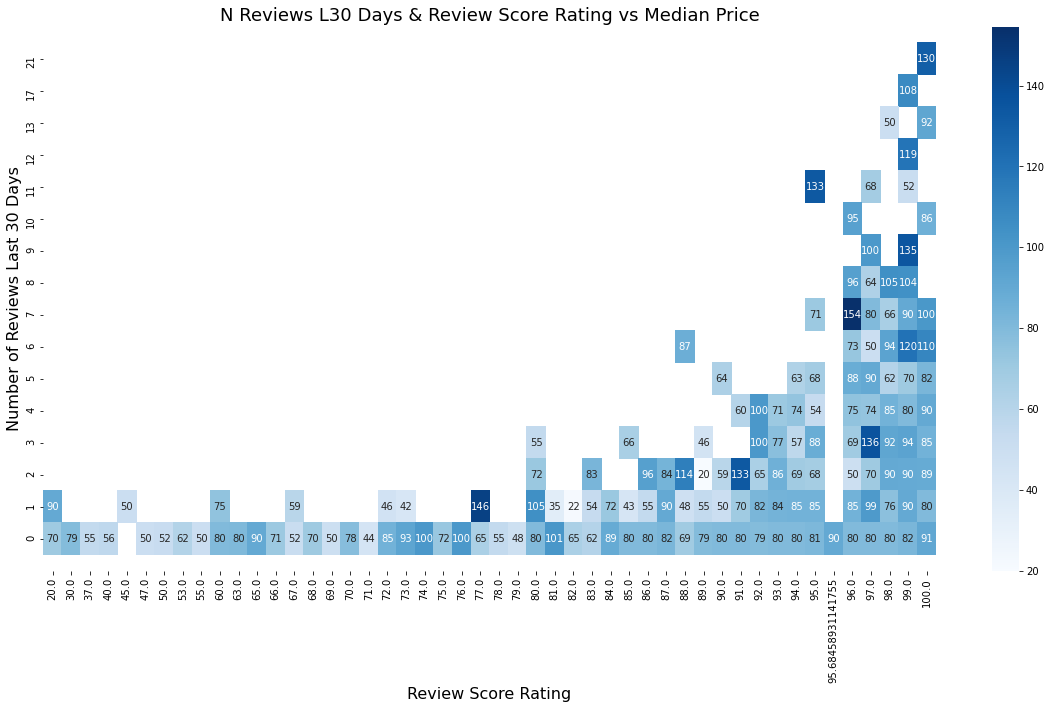

In [44]:
plot_heatmap(df=listings, groupby1='number_of_reviews_l30d', groupby2='review_scores_rating',\
             x_label='Review Score Rating', y_label='Number of Reviews Last 30 Days',\
             plt_title = 'N Reviews L30 Days & Review Score Rating vs Median Price')

<Figure size 720x576 with 0 Axes>

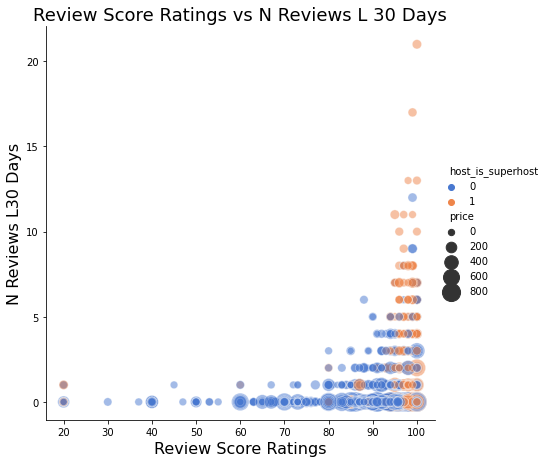

In [45]:
plt.figure(figsize=(10, 8))
sns.relplot(x="review_scores_rating", y="number_of_reviews_l30d", size="price", hue="host_is_superhost",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=listings)
plt.xlabel('Review Score Ratings', fontsize=16)
plt.ylabel('N Reviews L30 Days', fontsize=16)
plt.title('Review Score Ratings vs N Reviews L 30 Days', fontsize=18);

We can see that the majority of hosts are awarded relatively high ratings as most of the data is concentrated on the right hand side of the plot above. We can also see that all hosts who received 7+ ratings in the last 30 days have a review rating score of at least 95%. In terms of price, there still seems to be a relatively wide range for those with 7+ ratings and 95%+ review score rating. This suggests that a combination of these features affect the overall price of the listing. Superhosts also tend to have higher overall Review Score Ratings.

# 5 - Model

### Q4 - Can the price of a listing be predicted? This could be used by hosts when listing to determine what to charge for the listing.


As we will be training and running a model, we need to ensure all categorical variables are handled appropriately.

In [46]:
#drop these as they have columns representing the same information already and not needed for ML model
cols_to_drop = ['neighbourhood', 'region_id', 'property_type', 'region_parent_id', 'region_parent_parent_id']
listings = listings.drop(cols_to_drop, axis=1)

# get dummies for categorical features
obj_cols = ['host_response_time', 'room_type', 'region_name', 'region_parent_name', 'region_parent_parent_name']
enc_cols = pd.get_dummies(listings[obj_cols], dummy_na=True)
listings = listings.drop(obj_cols, axis=1)

listings = listings.join(enc_cols)

Split data into target (`price`) and features (all other columns) 

In [47]:
X = listings.copy() # features
y = X.pop('price') # target

Try Recursive Feature Elimination to determine important features as we have 287 in the dataset:

(Background Info: https://machinelearningmastery.com/rfe-feature-selection-in-python/)

Note: The cell below can take some time to finish running due to iteration.

In [48]:
lr_model = LinearRegression()
r_sq = []
num_range = np.arange(5, 100, 5)
RANDOM_STATE = 42

for n in num_range:
    
    # fit and transform data
    rfe = RFE(lr_model, n)
    X_rfe = rfe.fit_transform(X, y) 
    
    # fit
    lr_model.fit(X_rfe, y)
    X_new_feats = X.iloc[:, rfe.support_]
    
    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_new_feats, \
                        y, test_size=0.3, random_state=RANDOM_STATE)
    
    # fit the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    # append r squared score to list
    r_sq.append(r2_score(y_test, y_pred))

C:\Users\SNicConmara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\SNicConmara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\SNicConmara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\SNicConmara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From ve

See how many features are selected:

In [49]:
#max_arg = np.asarray(r_sq).argmax()
f_n = num_range[np.asarray(r_sq).argmax()]

#fit and transform
rfe = RFE(lr_model, f_n)
X_rfe = rfe.fit_transform(X, y) 

#fit model
lr_model.fit(X_rfe, y)
X_new_feats = X.iloc[:, rfe.support_]

# features selected
print(f'Num Features Selected : {f_n}')

# split new data  into train and test (using X_new_feats)
X_train, X_test, y_train, y_test = train_test_split(X_new_feats, y, \
                                test_size=0.3, random_state=RANDOM_STATE)

# fit final model
final_model = LinearRegression()
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

C:\Users\SNicConmara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=85 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features Selected : 85


Evaluate the model:

In [50]:
# r squared
r2 = r2_score(y_test, pred)
# mean squared error
mse = mean_squared_error(y_test, pred, squared=True)

print(f'R Squared :\t {r2}')
print(f'MSE :\t\t {mse}')

# cross validation
cross_val = cross_val_score(final_model, X_new_feats, y, cv=10)
print("CV Folds Mean :\t", cross_val_score(final_model, X_new_feats, y, cv=10).mean())
print("St. Dev. :\t" , cross_val.std())

R Squared :	 0.32841953289704406
MSE :		 6258.566818393358
CV Folds Mean :	 0.33254057904139744
St. Dev. :	 0.018188923323495237


Plot Target vs Predicted Values:

C:\Users\SNicConmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SNicConmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


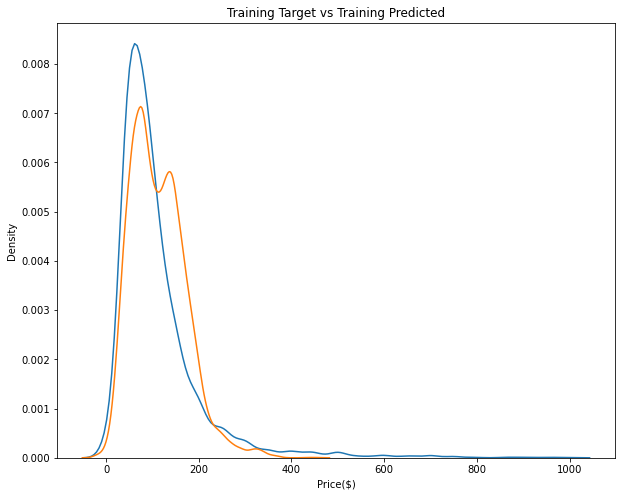

In [51]:
ax1 = plt.figure(figsize=(10, 8))
ax1 = sns.distplot(y_test, hist=False) # target vals from training
ax2 = sns.distplot(pred, ax=ax1, hist=False) # predicted vals from training
plt.xlabel('Price($)')
plt.title('Training Target vs Training Predicted');

Investigate coefficients:

In [52]:
coef_data = list(final_model.coef_)
coef_index = X_new_feats.columns

df_coef = pd.DataFrame(data=coef_data, index=coef_index).reset_index()
df_coef = df_coef.rename(columns={'index': 'Feature', 0: 'Coefs'})
df_coef = df_coef.sort_values(by=['Coefs'], ascending=False)
df_coef

,Feature,Coefs
1,host_total_listings_count,4.077537e+10
8,hostver_ sent_id,1.034109e+02
13,hostver_offline_government_id,6.922957e+01
37,region_name_Clonmel LEA-6,4.566819e+01
49,region_name_Killarney LEA-7,4.017357e+01
55,region_name_Moate LEA-4,3.936379e+01
52,region_name_Longford LEA-7,3.785452e+01
62,region_name_Pembroke LEA-5,3.611053e+01
44,region_name_Ennistimon LEA-4,3.472007e+01
16,room_type_Entire home/apt,3.303977e+01


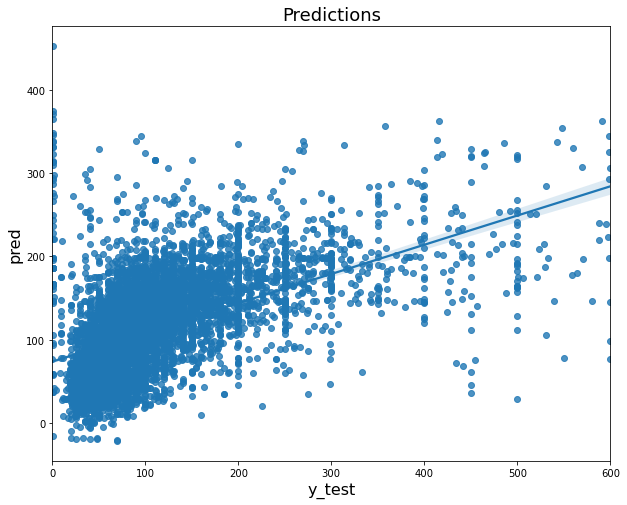

In [53]:
# Predicted prive VS. actual price 
plt.figure(figsize=(10,8))
plt.title('Predictions', fontsize=18)
sns.regplot(x = y_test,  y = pred)
plt.xlim(0, 600)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('pred', fontsize=16);

As we saw in the earlier exploratory data analysis, the region has an impact on the price of the listing. Let's have a look at the impact regions have on the listing price.

In [54]:
split_feats = lambda row: row.split('_')[3] # remove underscores so we return original feature name before encoding

region_parent_names = df_coef[df_coef.Feature.str.contains('region_parent_name')].sort_values(by='Coefs', ascending=False)
region_parent_names['Feature'] = region_parent_names.Feature.apply(split_feats)

region_parent_names.head()

,Feature,Coefs
77,Galway City Council,26.198304
79,Louth County Council,10.888818
81,Tipperary County Council,-19.637536
78,Longford County Council,-22.413229
82,Wexford County Council,-24.980271


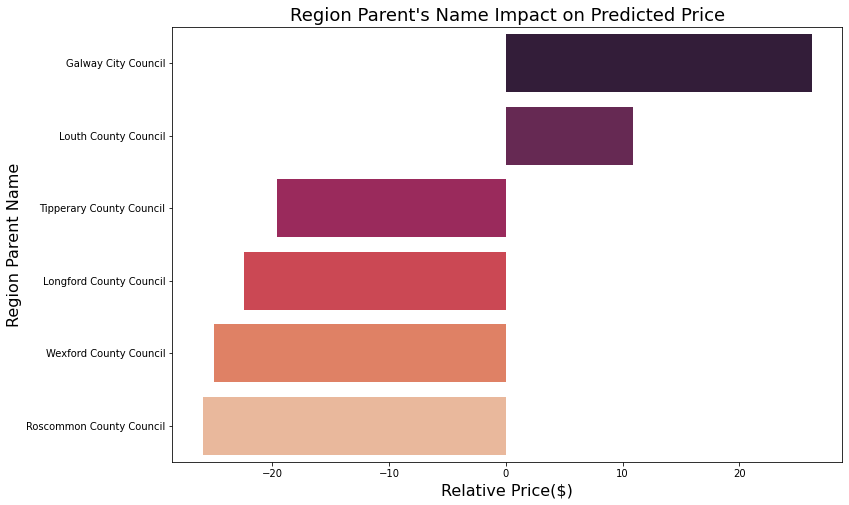

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefs', y='Feature', data=region_parent_names, palette='rocket')
plt.xlabel('Relative Price($)', fontsize=16)
plt.ylabel('Region Parent Name', fontsize=16)
plt.title("Region Parent's Name Impact on Predicted Price", fontsize=18);

Of the features in `df_coef`, the majority of them are related to region_name/region_parent_name or host verification which makes sense as we saw earlier that price can greatly vary depending on the region of the listing. Host verification is an interesting one as its unclear how many forms of verification a host is required to have to even host a listing.

In [56]:
host = df_coef[df_coef.Feature.str.contains('hostver_')].sort_values(by='Coefs', ascending=False)
host.head()

,Feature,Coefs
8,hostver_ sent_id,103.410863
13,hostver_offline_government_id,69.229572
9,hostver_ work_email,18.022868
5,hostver_ kba,-8.186538
7,hostver_ manual_online,-9.263758


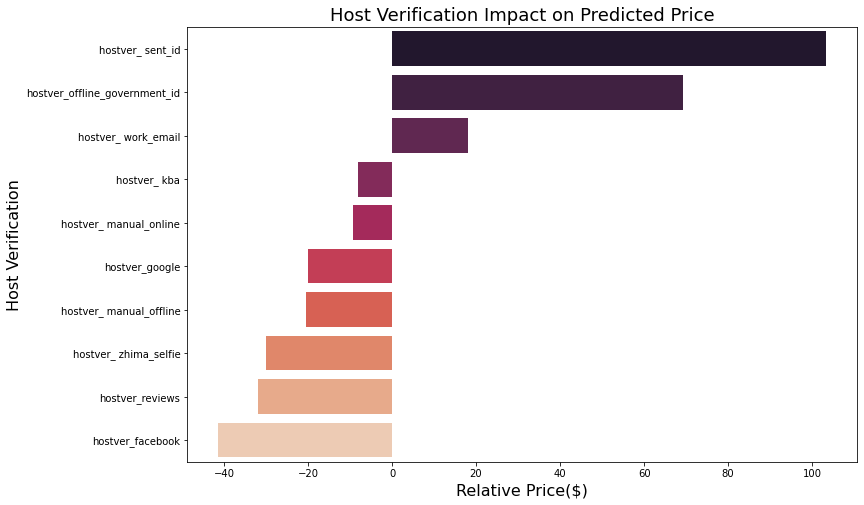

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefs', y='Feature', data=host, palette='rocket')
plt.xlabel('Relative Price($)', fontsize=16)
plt.ylabel('Host Verification', fontsize=16)
plt.title("Host Verification Impact on Predicted Price", fontsize=18);

# Conclusions

1. **Where in Ireland is the mean/median price for an AirBnB the most expensive?** 

The top 3 most expensive regions based on median listing price are:

    1 - Kerry County Council
    
    2 - Louth County Council
    
    3 - Galway City Council


2. **What counties have the fewest AirBnBs and could be areas potential hosts may consider listing a property in? Also, what kind of rooms are most popular? (and therefore be considered by potential hosts)**

The 3 regions which the fewest AirBnB listings are:

    1 - Longford County Council
    
    2 - Monaghan County Council
    
    3 - Offaly County Council
   
The top 2 most popular types of rooms across AirBnB in Ireland are entire home/apt and private rooms.



3. **What features affect the price of the listing?** E.g.:

    - does being a superhost/the hosts' reviews affect price?

Being a superhost does not seem to affect price while the hosts review rating seems to be higher when the host is a superhost.
    
   - does the number of bedrooms/bathrooms affect price?
   
The number of bedrooms and bathrooms usually affects the price, however the increase steadies as the number of bedrooms becomes much larger - e.g. 2 bedroom listings vs 14 bedroom listings.
    
   - does the number of reviews/overall review score rating affect price?

We can see that all hosts who received 7+ ratings in the last 30 days have a review rating score of at least 95%. In terms of price, there still seems to be a relatively wide range for those with 7+ ratings and 95%+ review score rating. This suggests that a combination of these features affect the overall price of the listing. Superhosts also tend to have higher overall Review Score Ratings.
    
    
4. **Can the price of a listing be predicted? This could be used by hosts when listing to determine what to charge for the listing.**

We've seen from the simple Linear Regression model that the region and the host's verification have the strongest impact on predicting the price of a listing.